In [72]:
import seaborn as sns 
data=sns.load_dataset('titanic') 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [76]:
data.shape

(891, 15)

### Drop duplicated rows

In [79]:
duplicated_rows=data.duplicated() 
duplicated_rows

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [81]:
duplicated_rows.sum()

107

In [83]:
data.drop_duplicates(inplace=True)

In [85]:
data.shape

(784, 15)

In [87]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Missing values

In [90]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

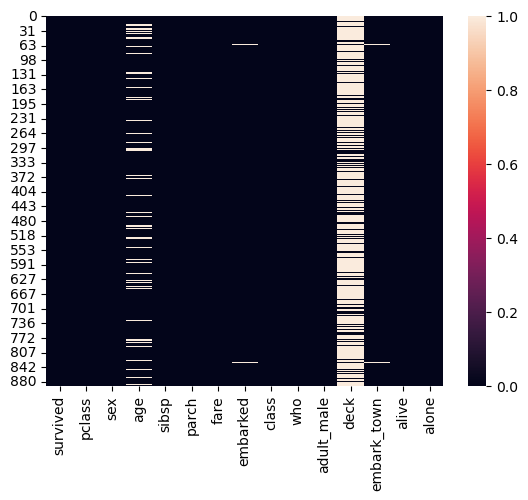

In [92]:
sns.heatmap(data.isna()) 
plt.show()

In [93]:
#percentage 
data.isna().sum()/data.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

## Handling missing values

### Splitting numerical and categorical columns

In [97]:
num_df=data.select_dtypes(include='number') 
cat_df=data.select_dtypes(include='object_') 

In [100]:
print('Numerical columns are:') 
num_cols=num_df.columns.tolist() 
print(num_cols) 
print('categorical columns are:') 
cat_cols=cat_df.columns.tolist() 
print(cat_cols) 

Numerical columns are:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
categorical columns are:
['sex', 'embarked', 'who', 'embark_town', 'alive']


### Filling missing values for numerical columns

In [103]:
for col in num_cols:
    num_df[col]=num_df[col].fillna(num_df[col].median())

In [105]:
num_df[col].median()

15.9

### Filling missing values for categorical columns

In [108]:
for col in cat_cols: 
    cat_df[col]=cat_df[col].fillna(cat_df[col].mode()[0])

In [110]:
cat_df[col].mode()

0    no
Name: alive, dtype: object

In [112]:
# check if missing values are filled 
cat_df.isna().sum()

sex            0
embarked       0
who            0
embark_town    0
alive          0
dtype: int64

### combine both categorical and numerical values 

In [115]:
data=pd.concat([num_df,cat_df],axis=1) 
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
0,0,3,22.00,1,0,7.2500,male,S,man,Southampton,no
1,1,1,38.00,1,0,71.2833,female,C,woman,Cherbourg,yes
2,1,3,26.00,0,0,7.9250,female,S,woman,Southampton,yes
3,1,1,35.00,1,0,53.1000,female,S,woman,Southampton,yes
4,0,3,35.00,0,0,8.0500,male,S,man,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,woman,Queenstown,no
887,1,1,19.00,0,0,30.0000,female,S,woman,Southampton,yes
888,0,3,28.25,1,2,23.4500,female,S,woman,Southampton,no
889,1,1,26.00,0,0,30.0000,male,C,man,Cherbourg,yes


### Check duplicate columns 

In [118]:
dup_cols=data.columns.duplicated()

In [120]:
data=data.iloc[:,~dup_cols] 
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
0,0,3,22.00,1,0,7.2500,male,S,man,Southampton,no
1,1,1,38.00,1,0,71.2833,female,C,woman,Cherbourg,yes
2,1,3,26.00,0,0,7.9250,female,S,woman,Southampton,yes
3,1,1,35.00,1,0,53.1000,female,S,woman,Southampton,yes
4,0,3,35.00,0,0,8.0500,male,S,man,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,woman,Queenstown,no
887,1,1,19.00,0,0,30.0000,female,S,woman,Southampton,yes
888,0,3,28.25,1,2,23.4500,female,S,woman,Southampton,no
889,1,1,26.00,0,0,30.0000,male,C,man,Cherbourg,yes


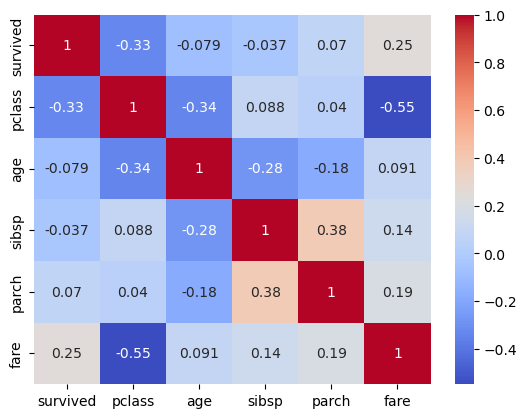

In [122]:
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm") 
plt.show()

### Outlier handling

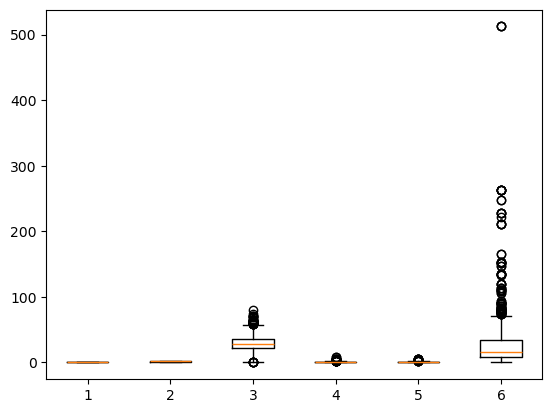

In [125]:
plt.boxplot(num_df) 
plt.show()

## Data imbalancing

In [128]:
data["embark_town"].value_counts()

embark_town
Southampton    570
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

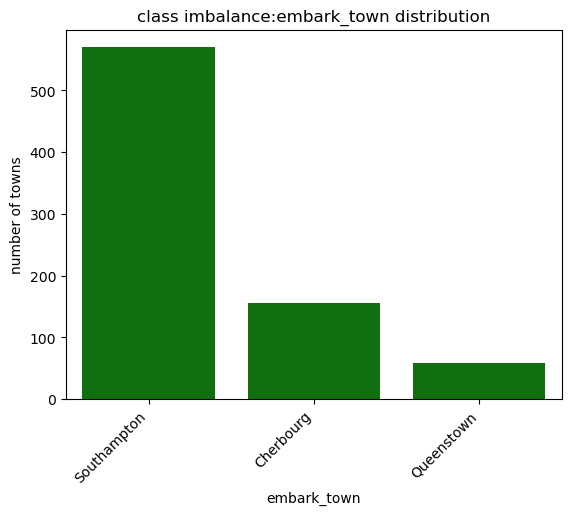

In [130]:
sns.countplot(x="embark_town",data=data,color="g") 
plt.title("class imbalance:embark_town distribution") 
plt.xlabel("embark_town") 
plt.ylabel("number of towns") 
plt.xticks(rotation=45,ha="right") 
plt.show()

In [131]:
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

X=data.drop("embark_town",axis=1) 
Y=data["embark_town"]

oversampler=RandomOverSampler(random_state=42) 
X_resampled,y_resampled=oversampler.fit_resample(X,Y) 

embark_town
Southampton    570
Cherbourg      570
Queenstown     570
Name: count, dtype: int64


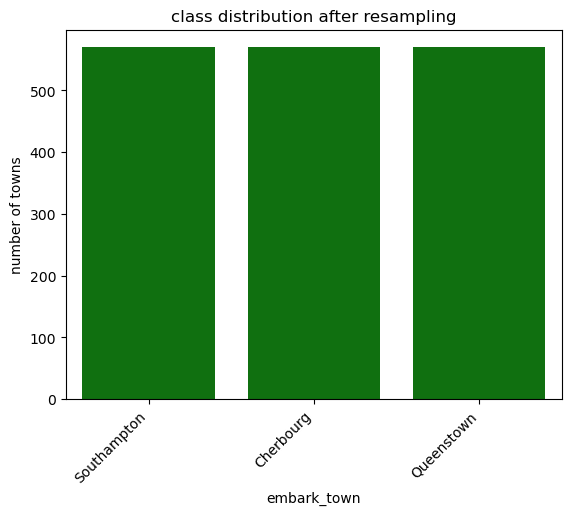

In [134]:
#create a new balanced DataFrame
balanced_data=pd.DataFrame(X_resampled,columns=X.columns) 
balanced_data["embark_town"]=y_resampled 
#check the class distribution after resampling 
print(balanced_data["embark_town"].value_counts()) 
sns.countplot(x="embark_town",data=balanced_data,color="g") 
plt.title("class distribution after resampling") 
plt.xlabel("embark_town") 
plt.ylabel("number of towns") 
plt.xticks(rotation=45,ha="right") 
plt.show()

### train-Test Split

In [138]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) 
X_train

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
691,1,3,4.00,0,1,13.4167,female,C,child,yes
169,0,3,28.00,0,0,56.4958,male,S,man,no
233,1,3,5.00,4,2,31.3875,female,S,child,yes
197,0,3,42.00,0,1,8.4042,male,S,man,no
28,1,3,28.25,0,0,7.8792,female,Q,woman,yes
...,...,...,...,...,...,...,...,...,...,...
826,0,3,28.25,0,0,56.4958,male,S,man,no
309,1,1,30.00,0,0,56.9292,female,C,woman,yes
496,1,1,54.00,1,0,78.2667,female,C,woman,yes
559,1,3,36.00,1,0,17.4000,female,S,woman,yes


In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
X_train

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,alive
371,0,3,18.0,1,0,6.4958,male,S,man,no
165,1,3,9.0,0,2,20.5250,male,S,child,yes
779,1,1,43.0,0,1,211.3375,female,S,woman,yes
339,0,1,45.0,0,0,35.5000,male,S,man,no
607,1,1,27.0,0,0,30.5000,male,S,man,yes
...,...,...,...,...,...,...,...,...,...,...
599,1,1,49.0,1,0,56.9292,male,C,man,yes
661,0,3,40.0,0,0,7.2250,male,C,man,no
550,1,1,17.0,0,2,110.8833,male,C,man,yes
591,1,1,52.0,1,0,78.2667,female,C,woman,yes


## Encoding and scaling

In [143]:
import numpy as np 
import pandas as pd
import seaborn as sns 
data=sns.load_dataset('titanic') 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### label encoding

In [150]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
label_enc=LabelEncoder() 
data['embark_town_encoded']=label_enc.fit_transform(data['embark_town']) 
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,2
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


### Order encoding

In [153]:
sex_order=['male','female'] 

ordinal_enc=OrdinalEncoder(categories=[sex_order]) 
data['sex_encoded']=ordinal_enc.fit_transform(data[['sex']]) 
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded,sex_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2,0.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,2,1.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2,1.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,0.0


In [155]:
pclass_order=[1,2,3] 

ordinal_enc=OrdinalEncoder(categories=[pclass_order]) 
data['pclass_encoded']=ordinal_enc.fit_transform(data[['pclass']]) 
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.0,2.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1.0,2.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,2,1.0,0.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2,1.0,2.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,0.0,0.0


### One Hot encoding

In [160]:
embark_town_onehot=pd.get_dummies(data['embark_town']) 
embark_town_onehot

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [162]:
embark_town_onehot=pd.get_dummies(data,columns=['embark_town']) 
embark_town_onehot.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,2,0.0,2.0,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,0,1.0,0.0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,2,1.0,2.0,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,2,1.0,0.0,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,2,0.0,2.0,False,False,True


In [164]:
embark_town_onehot=pd.get_dummies(data,columns=['embark_town'],prefix='col') # add prefix
embark_town_onehot.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,col_Cherbourg,col_Queenstown,col_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,2,0.0,2.0,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,0,1.0,0.0,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,2,1.0,2.0,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,2,1.0,0.0,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,2,0.0,2.0,False,False,True


In [166]:
embark_town_onehot=pd.get_dummies(data,columns=['embark_town'],prefix='col',dtype=int) 
embark_town_onehot.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,col_Cherbourg,col_Queenstown,col_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,2,0.0,2.0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,0,1.0,0.0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,2,1.0,2.0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,2,1.0,0.0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,2,0.0,2.0,0,0,1


In [168]:
embark_town_onehot=pd.get_dummies(data,columns=['embark_town'],prefix='col',dtype=int,drop_first=True) 
embark_town_onehot.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,col_Queenstown,col_Southampton
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,2,0.0,2.0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,0,1.0,0.0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,2,1.0,2.0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,2,1.0,0.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,2,0.0,2.0,0,1


In [170]:
from sklearn.preprocessing import OneHotEncoder 
one_hot_enc=OneHotEncoder(sparse_output=False) 
embark_town_encoded=one_hot_enc.fit_transform(data[['embark_town']]) 
embark_town_encoded

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [174]:
one_hot_data=pd.DataFrame(embark_town_encoded,columns=one_hot_enc.get_feature_names_out(['embark_town'])) 
one_hot_data

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [178]:
new_data=pd.concat([data,one_hot_data],axis=1) 
new_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,2,0.0,2.0,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,2,1.0,2.0,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,2,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,2,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,Southampton,no,True,2,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,Southampton,yes,True,2,1.0,0.0,0.0,0.0,1.0,0.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,Southampton,no,False,2,1.0,2.0,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,0,0.0,0.0,1.0,0.0,0.0,0.0


### Feature scaling

In [181]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

std_scaler=StandardScaler() 
data['age_std_scaler']=std_scaler.fit_transform(data[['age']]) 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,age_std_scaler
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.0,2.0,-0.530377
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,0.0,0.571831
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1.0,2.0,-0.254825
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1.0,0.0,0.365167
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2,0.0,2.0,0.365167


In [183]:
minmax_scaler=MinMaxScaler() 
data['age_minmax_scaler']=minmax_scaler.fit_transform(data[['age']]) 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,age_std_scaler,age_minmax_scaler
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.0,2.0,-0.530377,0.271174
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,0.0,0.571831,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1.0,2.0,-0.254825,0.321438
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1.0,0.0,0.365167,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2,0.0,2.0,0.365167,0.434531


In [195]:
#set the feature range
minmax_scaler=MinMaxScaler(feature_range=(1,2)) 
data['age_minmax_scaler']=minmax_scaler.fit_transform(data[['age']]) 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embark_town_encoded,sex_encoded,pclass_encoded,age_std_scaler,age_minmax_scaler
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0.0,2.0,-0.530377,1.271174
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1.0,0.0,0.571831,1.472229
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1.0,2.0,-0.254825,1.321438
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1.0,0.0,0.365167,1.434531
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2,0.0,2.0,0.365167,1.434531
